In [33]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers

# 1. Daten laden und vorbereiten
(ds_train_all, ds_test), ds_info = tfds.load(
    'fashion_mnist',                    #Name des Datensatzes
    split=['train', 'test'],            #Datensatz schon on train und test aufegeteilt
    as_supervised=True,                 #Supervised Learning: Label sind den zugehörigen Bildern zugeordnet
    with_info=True
)

def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label

BATCH_SIZE = 128
num_train_examples = ds_info.splits['train'].num_examples
num_validation_examples = int(0.1 * num_train_examples)

ds_validation = ds_train_all.take(num_validation_examples)
ds_train = ds_train_all.skip(num_validation_examples)

train_steps = num_train_examples // BATCH_SIZE
validation_steps = num_validation_examples // BATCH_SIZE

ds_train = ds_train.map(normalize_img).shuffle(1000).batch(BATCH_SIZE).repeat().prefetch(tf.data.AUTOTUNE)
ds_validation = ds_validation.map(normalize_img).batch(BATCH_SIZE).repeat().prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE) 

# 2. Modell erstellen und kompilieren
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# 3. Modell trainieren
history = model.fit(
    ds_train,
    epochs=10,
    steps_per_epoch=train_steps,
    validation_data=ds_validation,
    validation_steps=validation_steps
)

Epoch 1/10
468/468 [==============================] - 2s 3ms/step - loss: 0.5526 - accuracy: 0.8117 - val_loss: 0.4325 - val_accuracy: 0.8531
Epoch 2/10
468/468 [==============================] - 1s 2ms/step - loss: 0.4024 - accuracy: 0.8586 - val_loss: 0.3735 - val_accuracy: 0.8725
Epoch 3/10
468/468 [==============================] - 1s 2ms/step - loss: 0.3620 - accuracy: 0.8724 - val_loss: 0.3566 - val_accuracy: 0.8748
Epoch 4/10
468/468 [==============================] - 1s 2ms/step - loss: 0.3346 - accuracy: 0.8802 - val_loss: 0.3572 - val_accuracy: 0.8725
Epoch 5/10
468/468 [==============================] - 1s 2ms/step - loss: 0.3155 - accuracy: 0.8867 - val_loss: 0.3301 - val_accuracy: 0.8838
Epoch 6/10
468/468 [==============================] - 1s 2ms/step - loss: 0.3006 - accuracy: 0.8910 - val_loss: 0.3306 - val_accuracy: 0.8825
Epoch 7/10
468/468 [==============================] - 1s 2ms/step - loss: 0.2870 - accuracy: 0.8960 - val_loss: 0.3013 - val_accuracy: 0.8932
Epoch 

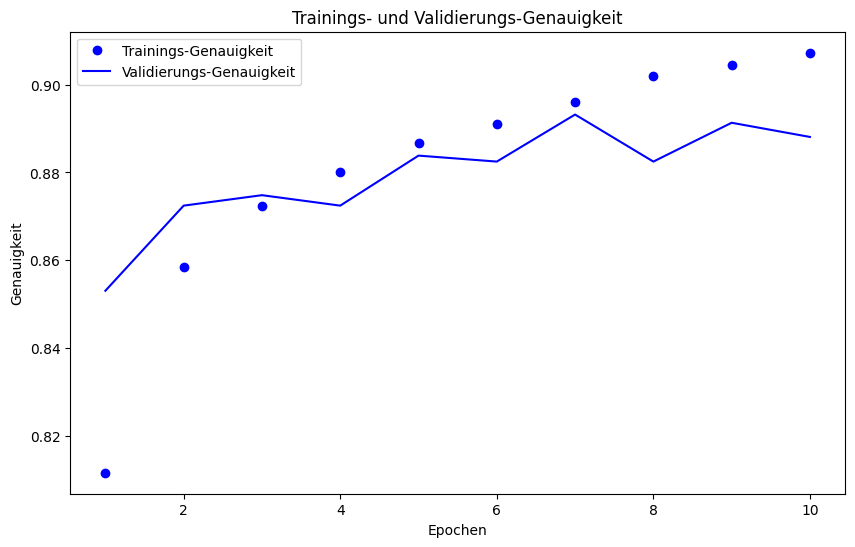

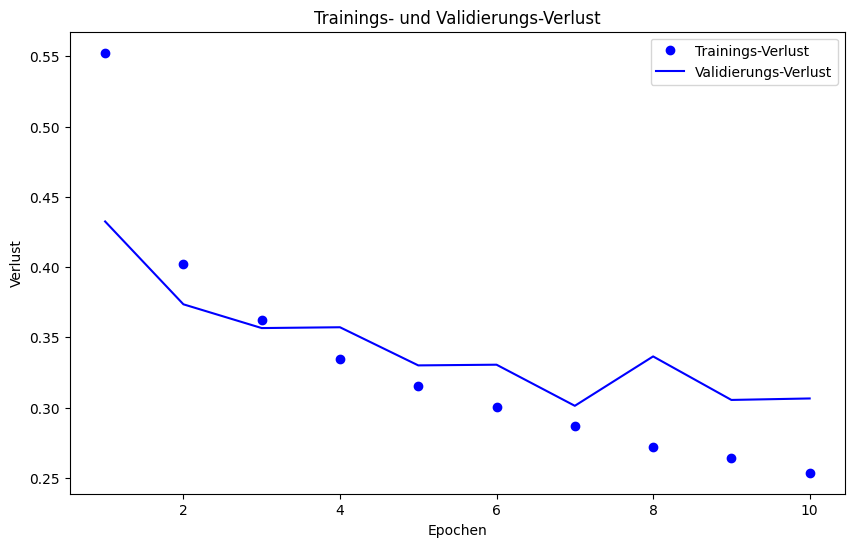

In [34]:
import matplotlib.pyplot as plt

# Zugriff auf die Daten aus dem history-Objekt
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_accuracy) + 1)

## Diagramm für Genauigkeit
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'bo', label='Trainings-Genauigkeit')
plt.plot(epochs, validation_accuracy, 'b', label='Validierungs-Genauigkeit')
plt.title('Trainings- und Validierungs-Genauigkeit')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')
plt.legend()
plt.show()

## Diagramm für Verlust
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'bo', label='Trainings-Verlust')
plt.plot(epochs, validation_loss, 'b', label='Validierungs-Verlust')
plt.title('Trainings- und Validierungs-Verlust')
plt.xlabel('Epochen')
plt.ylabel('Verlust')
plt.legend()
plt.show()

In [35]:
loss, accuracy = model.evaluate(ds_test)
print(f"Genauigkeit auf den Testdaten: {accuracy}")

79/79 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8791
Genauigkeit auf den Testdaten: 0.8791000247001648


1/1 [==============================] - 0s 15ms/step


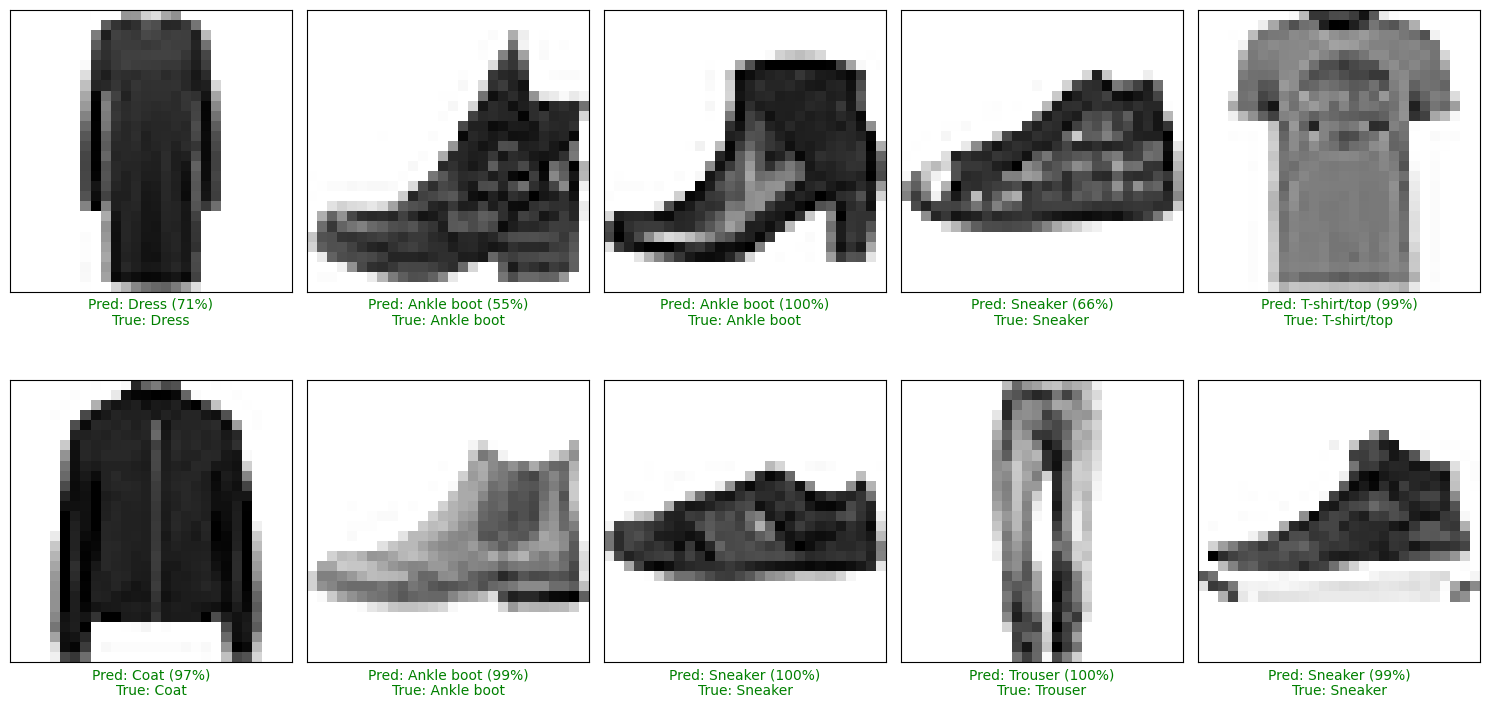

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers

# --- 1. Stellen Sie sicher, dass Ihr Modell trainiert und verfügbar ist ---
# Dieser Teil sollte aus Ihrem vorherigen Code stammen

# Laden des originalen Datensatzes für die Visualisierung (erneut, ungebatcht)
# Dies ist wichtig, damit wir einzelne Bilder entnehmen können
(ds_train_all_full, ds_test_unbatched), ds_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

def normalize_img_for_display(image, label):
  # Hier nur normalisieren, nicht batchen oder shuffeln
  return tf.cast(image, tf.float32) / 255., label

# Diesen Datensatz nur mappen, nicht batchen oder wiederholen!
ds_test_display = ds_test_unbatched.map(normalize_img_for_display).shuffle(1000)

# Die Klassennamen des Fashion-MNIST-Datensatzes
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# --- 2. Anwendung des Modells auf Testbilder und Anzeige ---

# Holen Sie sich eine bestimmte Anzahl von EINZELNEN Bildern aus dem ds_test_display
num_images_to_show = 10
sample_images_for_predict = []
sample_labels = []

# Iteriere über den ungebatchten, nur normalisierten Datensatz
for image, label in ds_test_display.take(num_images_to_show):
    sample_images_for_predict.append(image) # Bild ist bereits normalisiert
    sample_labels.append(label.numpy())

# Konvertieren Sie die Liste der Einzelbilder in ein NumPy-Array
# Shape wird (num_images_to_show, 28, 28, 1) sein
sample_images_np = np.array(sample_images_for_predict)

# Führen Sie die Vorhersage mit dem trainierten Modell durch
predictions = model.predict(sample_images_np)

plt.figure(figsize=(15, 8))
for i in range(num_images_to_show):
    plt.subplot(2, 5, i + 1)
    # Zeigen Sie das Bild an (bereits normalisiert und korrekt geformt)
    plt.imshow(sample_images_for_predict[i].numpy().squeeze(), cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])

    predicted_label = np.argmax(predictions[i])
    true_label = sample_labels[i]

    color = 'green' if predicted_label == true_label else 'red'
    
    plt.xlabel(f"Pred: {class_names[predicted_label]} ({100*np.max(predictions[i]):.0f}%)\nTrue: {class_names[true_label]}",
               color=color)
plt.tight_layout()
plt.show()